#                           TUTORIAL 1 : Lagrange and Hermite interpolation

---------------------------------------------------------------------------------------------------------------------




# PART 1: Lagrange  interpolation and Runge phenomenon

The aim here is to show Runge's phenomenon for the polynomial interpolation. We are going to implement an algorithm that is linear in the number of nodes. 

Let $f: [a,b] \to \mathbb{R}$ a function and $x_0,\cdots,x_n$ in $[a,b]$. We recall that the Lagrange polynomial $P_n$ is given by the following formula
$$ P_n(x)  = f(x_0) + \sum_{k=1}^n f[x_0,\cdots,x_k] (x-x_0)\cdots(x-x_{k-1}),$$
where
$$
 f[x_j,x_{j+1},\cdots,x_k] = \frac{f[x_{j+1},\cdots,x_{k}] - f[x_j,\cdots,
      x_{k-1}]}{x_k - x_j}
      \quad \text{and}\quad f[x_j]=f(x_j).
$$
The goal is to implement the evaluation of $P_n$ using this formula in $O(n)$ operations. 


## 1) Evaluation of a polynomial in the Newton basis
Given a family of real numbers $x_0 <x_1\cdots < x_{n-1}$, one consider the polynomial $P$ over the form
 $$P(x) = a_0 + a_1 (x - x_0) + a_2 (x - x_0) (x - x_1) + \cdots + a_n (x - x_0) \cdots
  (x - x_{n-1}).$$ 
  Write a function $\textit{lagrange\_newton}$ that associates to two lists of real numbers $(x_i)$, $(a_i)$ and a real  $x$ the value $P(x)$ (and such that the number of operations is in  $\mathrm{O}(n)$).


In [2]:
import numpy as np

# Attention size(A) = size(X) (but we don't use the last element of X : X(n-1))
def lagrange_newton(A, X, x):
    n = len(A)
    result = A[-1]
    for i in range(n-2, -1, -1):
        result = result * (x - X[i]) + A[i]
    return result

## 2) Evaluation of the Newton coefficients

Write a function $\textit{coef\_newton}$ that associates to $X=(x_0,\cdots,x_n)$ and $F=(f(x_0),\cdots,f(x_n))$ the coefficients of the Lagrange polynomial in the basis 
$$\Big( (x-x_0)\cdots (x-x_{k}) \Big)_{0\leq k \leq n-1}.$$

In [3]:
# It returns size(Coef) = size(X)
def coef_newton(X, F):
    n = len(X)
    Coef = F.copy()
    for k in range(1, n):
        Coef[k:n] = (Coef[k:n] - Coef[k-1:n-1]) / (X[k:n] - X[0:n-k])
    return Coef


## 3) Lagrange polynomial evaluation

Write a function $\textit{lagrange\_polynomial}$ that calculates the Lagrange polynomial on $X,F$.

In [4]:
def lagrange_polynomial(X, F, x):
    A = coef_newton(X, F)
    Lagx = lagrange_newton(A, X, x)
    return Lagx


## 4) Exemple 1 : sinus

Plot the Lagrange polynomial for the function $\sin$ for $n=3,5,10$. What do you observe ?

Text(0.5, 1.0, 'Lagrange interpolation of sin(x)')

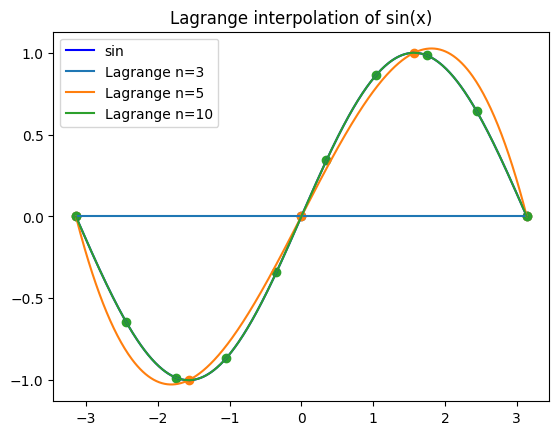

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

#  plot of sinus curve
x = np.linspace(-np.pi, np.pi, 500)
f = np.sin(x)
plt.plot(x, f, 'b', label="sin")

# Plot Lagrange polynomial for n=3,5,10
for n in [3, 5, 10]:
    Xn = np.linspace(-np.pi, np.pi, n)
    Fn = np.sin(Xn)
    y_interp = [lagrange_polynomial(Xn, Fn, xi) for xi in x]
    plt.plot(x, y_interp, label=f"Lagrange n={n}")
    plt.scatter(Xn, Fn, marker = 'o')

plt.legend()
plt.title("Lagrange interpolation of sin(x)")


Using $n = 3$, the uniform interpolation points are $(-\pi, 0, \pi)$ which are points where sinus cancels out, thus $L_3$ is the null polynomial.
The approximation is more precise using $ n= 10 $ than $ n = 5 $.

## 5) Exemple 2 : the square function

Plot the Lagrange polynomial and and the square function for $n=2,3,5$. What do you observe ?

Text(0.5, 1.0, 'Lagrange interpolation of x^2')

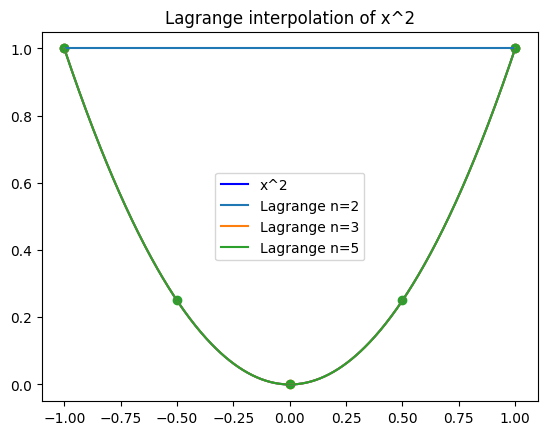

In [6]:
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 500)
f = x**2
plt.plot(x, f, 'b', label="x^2")

# Plot Lagrange polynomial for n=2,3,5
for n in [2, 3, 5]:
    Xn = np.linspace(-1, 1, n)
    Fn = Xn**2
    y_interp = [lagrange_polynomial(Xn, Fn, xi) for xi in x]
    plt.plot(x, y_interp, label=f"Lagrange n={n}")
    plt.scatter(Xn, Fn, marker = 'o')


plt.legend()
plt.title("Lagrange interpolation of x^2")


Using $n = 2$, the uniform interpolation points are $-1$ and $1$, where $x^2 = 1$, thus $L_2$ is the constant polynomial equal to $1$.
Since $f$ is itself a degree $2$ polynomial, the approximation is perfect using $n = 3$ and above, because there exists at least two points $x_1, x_2$ in the interpolation points such that $f(x_1) \neq f(x_2)$. It would actually be perfect using $n = 2$ with two such points.

## 6) Example 3. Runge phenomenon

Plot the Lagrange polynomial the function $f(x)=1/(1+25x^2)$ for $n=5,10,13$. What do you observe ?


Text(0.5, 1.0, 'Lagrange interpolation of f(x) = 1/(1+25x^2)')

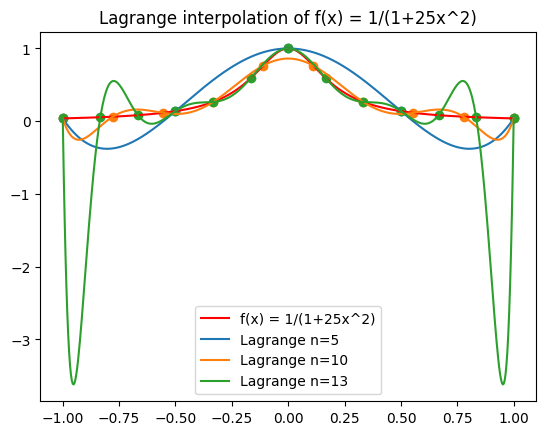

In [7]:
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 500)
f = 1/(1 + 25 * x**2)
plt.plot(x, f, 'r', label="f(x) = 1/(1+25x^2)")

# Plot Lagrange polynomial for n=5,10,13
for n in [5, 10, 13]:
    Xn = np.linspace(-1, 1, n)
    Fn = 1/(1 + 25 * Xn**2)
    y_interp = [lagrange_polynomial(Xn, Fn, xi) for xi in x]
    plt.plot(x, y_interp, label=f"Lagrange n={n}")
    plt.scatter(Xn, Fn, marker = 'o')

plt.legend()
plt.title("Lagrange interpolation of f(x) = 1/(1+25x^2)")


We observe that despite the overall approximation getting more precise as $n$ increases, the error grows (seemingly unbounded) around $-1$ and $1$. This is an example of the Runge Phenomenon. Formally, one can show that : 

$$
\lim_{n \to \infty} \left( \max_{-1 \leq x \leq 1} \left| f(x) - L_n(x) \right| \right) = \infty.
$$


We can mitigate these oscillations using the Tchebychev interpolation points, for which the interpolation error decreases with $n$.

# PART 2: Hermite Interpolation
The goal of this part is to provide a function $\textit{hermite}$ that interpolates both points and tangents. 
### 1) First define the functions $h_0$, $h_1$, $h_2$ and $h_3$ from $[0,1]$ to $\mathbb{R}$

In [8]:
def h0(t):
    return 2*t**3 - 3*t**2 + 1

def h1(t):
    return -2*t**3 + 3*t**2

def h2(t):
    return t**3 - 2*t**2 + t

def h3(t):
    return t**3 - t**2


### 2) Define a function $\textit{hermite}(Points,Vectors,Parameters,t)$. 
Here Points and Vectors are $2*n$ arrays, Parameter is a $1*n$ array and $t$ is a real number. The functions returns the evaluation at the parameter $t$.

In [9]:
def hermite(Points, Vectors, Parameters, t):
    # Find the interval [t_i, t_{i+1}] containing t
    n = len(Parameters)
    if t <= Parameters[0]:
        i = 0
    elif t >= Parameters[-1]:
        i = n - 2
    else:
        i = np.searchsorted(Parameters, t) - 1
    t0, t1 = Parameters[i], Parameters[i+1]
    p0, p1 = Points[:, i], Points[:, i+1]
    m0, m1 = Vectors[:, i], Vectors[:, i+1]
    h = t1 - t0
    tau = (t - t0) / h
    H = (
        h0(tau) * p0 +
        h1(tau) * p1 +
        h2(tau) * h * m0 +
        h3(tau) * h * m1
    )
    return H


### 3) Example with the function $x\mapsto 1/(1+25*x^2)$

Text(0.5, 1.0, 'Hermite interpolation of f(x) = 1/(1+25x^2)')

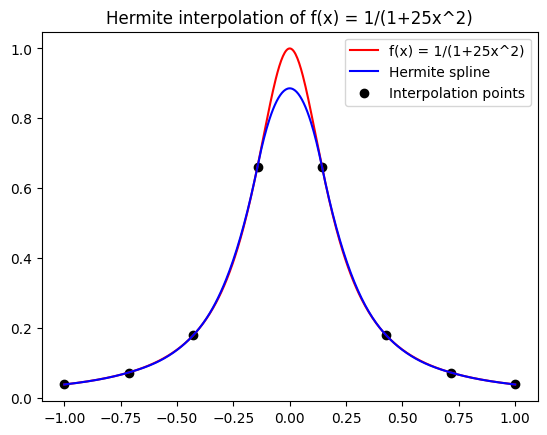

In [10]:
n = 8
# Define Points, Vectors and Parameters for the function x->1/(1+25x*x)
Parameters = np.linspace(-1, 1, n)  # les noeuds
Points = np.zeros((2, len(Parameters)))
Points[0, :] = np.array(Parameters)
Points[1, :] = 1/(1 + 25 * Parameters**2)  # les valeurs aux noeuds
Vectors = np.ones((2, len(Parameters)))
Vectors[1, :] = -50 * Parameters / ((1 + 25 * Parameters**2)**2)

# Plot the function x->1/(1+25x*x)
x = np.linspace(-1, 1, 500)
f = 1/(1 + 25 * x**2)
plt.plot(x, f, 'r', label="f(x) = 1/(1+25x^2)")

# Plot the Hermite spline associated to Points, Vectors and Parameters
y_hermite = np.array([hermite(Points, Vectors, Parameters, xi)[1] for xi in x])
plt.plot(x, y_hermite, 'b', label="Hermite spline")
plt.scatter(Parameters, Points[1, :], color='k', marker='o', label="Interpolation points")
plt.legend()
plt.title("Hermite interpolation of f(x) = 1/(1+25x^2)")
